# Лабораторная работа № 6
## Сети Кохонена

`Цель работы:` исследование свойств слоя Кохонена, карты Кохонена, а также сетей векторного квантования, обучаемых с учителем, алгоритмов обучения, а также применение сетей в задачах кластеризации и классификации.

|Студент| Мариничев И.А.|
|-|-|
|**Группа**| **М8О-408Б-19**|
|**Вариант**| **5**|

Импортируем всё необходимое

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from IPython.display import Image
import imageio

Зададим набор данных для обучения

In [2]:
X = [-1.2, -0.6, -0.4, -1, -1.5, 0.4, -1.1, 0.8, -0.2, 0.7, -1.4, 0.5]
Y = [0, 0.1, -0.3, -0.8, 1.2, 1.2, 1.2, 0.2, -0.8, -0.9, 0.8, 0.6]
labels = [-1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
labels = [1 if x == -1 else 2 for x in labels]

In [3]:
def get_train_data(X, Y, labels):
    train_data = [[x, y, l] for x, y, l in zip (X, Y, labels)]
    return train_data

In [4]:
train_data = get_train_data(X, Y, labels)

Определим размер карты Кохонена, начальный радиус и начальный коэффициент скорости обучения

In [5]:
WIDTH = 64
HEIGHT = 48
RADIUS = max(WIDTH, HEIGHT) // 2
LERNING_RATE = 1

Создадим класс слоя Кохонена

In [6]:
class SelfOrganizedMap():
    def __init__(self, in_features: int, width, height):
        self.nodes = np.random.randn(width * height, in_features)
        self.indices = np.array([[x, y] for x in range(height) for y in range(width)])

    def update(self, input, radius, learning_rate):
        BMU_id = np.argmin(np.linalg.norm(self.nodes - input, axis=1)) # Best Matching Unit
        distances = np.linalg.norm(self.indices - self.indices[BMU_id], axis=1)
        for distance, node in zip(distances, self.nodes):
            if distance < radius:
                influence = np.exp(-distance / (2 * radius))
                node += learning_rate * influence * (input - node)

Карта Кохонена на вход принимает вектор размерности `in_features`

In [7]:
SOM = SelfOrganizedMap(in_features=3, width=WIDTH, height=HEIGHT)

Определим функцию обучения и вспомогательные функции нормализации и визуализации

In [8]:
def normalize(data):  
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [9]:
def visualize(data, epoch, images):
    image_to_show = normalize(data).reshape((HEIGHT, WIDTH, 3))
    plt.imshow(image_to_show)

    plt.savefig(f'./img/epoch_{epoch}.png', transparent=False, facecolor='white')
    images.append(imageio.v2.imread(f'./img/epoch_{epoch}.png'))
    
    plt.close()

In [10]:
def fit(model, train_loader, radius, learning_rate, epochs):
    radiuses = []
    learning_rates = []
    images = []

    start_radius = radius
    start_learning_rate = learning_rate

    with tqdm(desc="learning", total=epochs) as pbar_outer:
        for epoch in range(epochs):
            for inputs in train_loader:
                model.update(inputs, radius, learning_rate)
        
            visualize(model.nodes, epoch+1, images)
        
            radius = start_radius * np.exp(-epoch / (epochs / np.log(start_radius)))
            radiuses.append(radius)

            learning_rate = start_learning_rate * np.exp(-epoch / epochs)
            learning_rates.append(learning_rate)
            
            pbar_outer.update()            
    imageio.mimsave('som.gif', images)
    return radiuses, learning_rates

Обучим модель

In [11]:
radiuses, learning_rates = fit(SOM, train_data, RADIUS, LERNING_RATE, 200)

learning: 100%|██████████| 200/200 [00:26<00:00,  7.58it/s]


Посмотрим, как менялись радиус и коэффициент скорости обучения

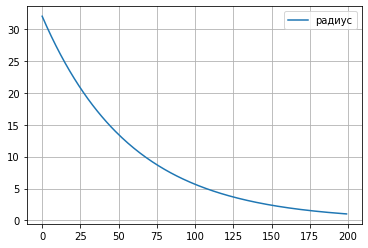

In [12]:
plt.plot(radiuses, label='радиус')
plt.grid(True, which='both')

plt.legend()
plt.show()

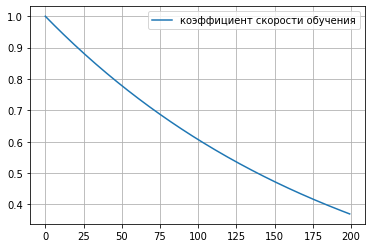

In [13]:
plt.plot(learning_rates, label='коэффициент скорости обучения')
plt.grid(True, which='both')

plt.legend()
plt.show()

Отрисуем точки, на которых происходило обучение

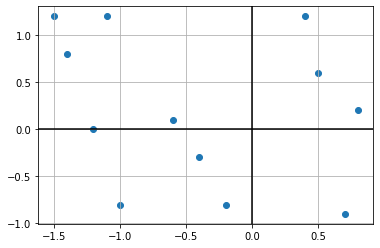

In [14]:
plt.scatter(X, Y)

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.show()

И посмотрим на карту Кохонена в процессе обучения

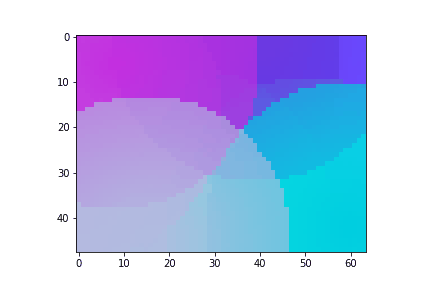

In [15]:
Image(open('som.gif','rb').read())

`Выводы:` в ходе данной работы была построена сеть Кохонена, которая была использована для задачи кластеризации. После `200` эпох обучения были получены верные результаты